<a href="https://colab.research.google.com/github/JoongseokPark/machine_learning_2023/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_7%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#인공신경망

1. 은닉층의 뉴런 하나가 받는 값
> 연결된 전 층의 값들을 각각 가중치에 곱한 총합이 뉴런의 값이 된다
2. 뉴런에 활성 함수를 사용해서 받은 값을 바꾸어 다음 층으로 넘긴다
> 주로 비선형 함수를 사용한다, 선형 함수는 층을 나누는 의미가 없기 때문이다
- 활성 함수 목록
1. Step Function 
> 출력은 0,1 뿐이다
2. Sigmoid Function
> 부드러워진 Step 함수, 하지만 Step과 마찬가지로 값이 작을 때 출력이 0, 클 때 1이다, 입력값이 작거나 클 때 미분값이 0에 수렴하므로, 딥러닝에는 맞지 않다(Vanishing Gradient 문제)
3. Tanh Function
> Sigmoid의 대체제이나 동일한 문제가 발견되었다
4. Rectified Linear Unit (ReLU)
> x > 0이면 기울기가 1인 직선이고, x < 0이면 함수값이 0이다, 위의 함수보다 학습이 빠르다, 구현이 빠르다, 하지만 x < 0에 대해서 출력이 0이므로 뉴런이 죽을 수도 있다
5. Leaky ReLU
> ReLU 함수와 거의 같으나, x < 0 일 때 출력이 (0 < a < 1) * x이다
6. PReLU (Parametric ReLU)
> Leaky ReLU와 거의 같지만, 파라미터 α가 추가되었다, 음수인 영역에서도 기울기를 학습할 수 있다
7. ELU (Exponential Linear Unit)
> ReLU의 장점을 가지고, 뉴런이 죽는 문제를 해결했다, x < 0일 때 α(e^x - 1) 출력을 가지므로, 기울기가 부드럽게 감소한다, 작은 수에서 수렴값은 -1 이다
8. ReLU6
> 임베디드 장치에서 데이터의 비트수를 제한하는 목적으로 ReLu의 값을 0~6으로 제한할 때 사용한다
9. Maxout 
> ReLU의 장점과 뉴런이 죽는 문제를 해결했다, 하지만 계산해야 하는 양이 많고 복잡하다, Convex Hull Trick(CHT)의 동작 방식과 유사

In [30]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np

# 심층 신경망으로 이미지 분류
1. 이미지 데이터셋 로드
2. 이미지 데이터 정규화 = 수렴속도 증가
3. Dense Layer에 입력하기 위한 차원축소 = reshape().shape
4. 모델 생성 = Denselayer(노드 수, 활성화 함수)
5. complie() = 컴파일(옵티마이저, 손실함수, 평가지표)
6. fit() = 훈련
7. 

In [2]:
#케라스 내장 데이터셋 업로드
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.9/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [3]:
#x에는 이미지가, y에는 정답이 들어있다
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


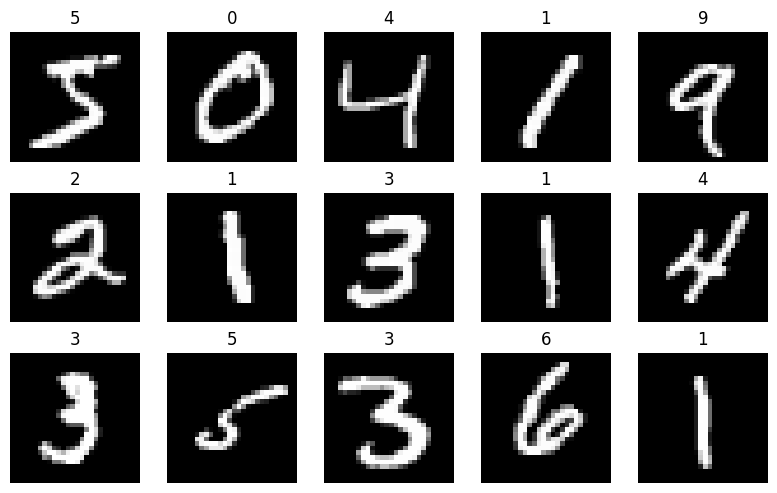

In [4]:
fig,axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  ax.imshow(x_train[i], cmap = 'gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

In [10]:
# [이미지 번호, 가로, 세로]
x_train[0,10:15,10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [8]:
#데이터 정규화 : 0~1 사이로 변환, 최대값으로 나누기
x_train_n = x_train / x_train.max()

In [11]:
x_train_n[0,10:15,10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

In [12]:
#차원 축소
x_train.reshape(60000,-1).shape 

(60000, 784)

In [13]:
tf.keras.layers.Flatten()(x_train).shape

TensorShape([60000, 784])

모델 생성 

In [19]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(256, activation = 'relu'),
                             tf.keras.layers.Dense(64, activation = 'relu'),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'softmax'),
                             ])

In [14]:
#활성화 함수
tf.keras.layers.Dense(128, activation='relu')

입력 출력력

In [ ]:
#출력층이 1인 경우 : sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

In [15]:
#출력층 노드가 2개 이상인 경우 : softmax
tf.keras.layers.Dense(10, activation='softmax')

손실 함수수

In [20]:
#출력 노드가 1개, sigmoid 활성화 함수일 경우
model.compile(loss='binary_crossentropy')

In [21]:
#softmax를 사용한 경우
model.compile(loss='categorical_crossentropy')

옵티마이저 = 손실을 낮추기 위해 사용하는 최적화 방법법

In [23]:
#클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam)

#문자열로 지정
model.compile(optimizer='adam')

평가지표 

In [24]:
acc = tf.keras.metrics.SparseCategoricalAccuracy()

총합 정리 

In [25]:
#모델의 뉴런 구조 + 옵티마이저 + 손실 함수 + 메트릭스 만들기 

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer = adam,loss = 'sparse_categorical_crossentropy',metrics = [acc])

훈련 

In [26]:
model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 1.3157 - sparse_categorical_accuracy: 0.6465 - val_loss: 0.5901 - val_sparse_categorical_accuracy: 0.8428
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3403 - sparse_categorical_accuracy: 0.9167 - val_loss: 0.2098 - val_sparse_categorical_accuracy: 0.9469
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1720 - sparse_categorical_accuracy: 0.9538 - val_loss: 0.1622 - val_sparse_categorical_accuracy: 0.9599
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1363 - sparse_categorical_accuracy: 0.9624 - val_loss: 0.1250 - val_sparse_categorical_accuracy: 0.9664
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1122 - sparse_categorical_accuracy: 0.9702 - val_loss: 0.1443 - val_sparse_categorical_accuracy: 0.9631
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0976 - spar

검증 

In [27]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1201 - sparse_categorical_accuracy: 0.9731


[0.12014755606651306, 0.9731000065803528]

In [28]:
#검증 결과 저장
test_loss, test_acc = model.evaluate(x_test, y_test)

print("검증 정확도 : ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1201 - sparse_categorical_accuracy: 0.9731
검증 정확도 :  0.9731000065803528


In [29]:
predictions = model.predict(x_test)
predictions[0]
# 출력값은 10개의 인덱스로 구성 = 각 인덱스 번호에 맞는 것일 확률 

313/313 [==============================] - 1s 2ms/step


array([5.3374692e-19, 3.3203671e-06, 1.6373888e-05, 8.6635828e-06,
       5.8611231e-06, 9.0803780e-08, 1.5605111e-15, 9.9996412e-01,
       5.1907401e-10, 1.5748574e-06], dtype=float32)

In [31]:
predictions[0].max()

0.9999641

In [32]:
#argmax = 리스트의 인덱스 중 내용물이 가장 큰 것을 반환
np.argmax(predictions[0])

7

In [37]:
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100 * np.max(predictions[idx])
  return img, y_true, y_pred, confidence

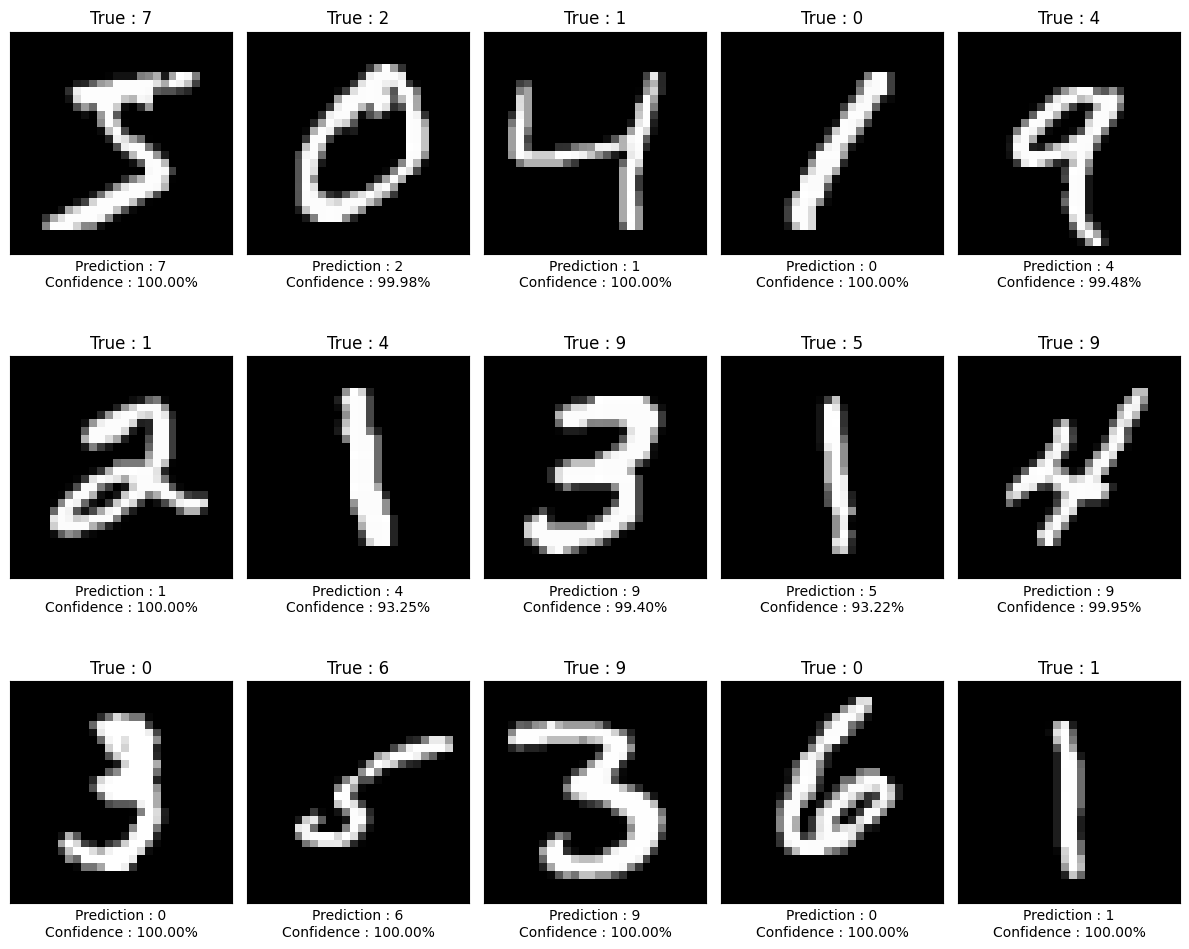

In [38]:
fig,axes = plt.subplots(3,5)
fig.set_size_inches(12,10)

for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i) 
  ax.imshow(x_train[i], cmap = 'gray')
  #x y 눈금
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True : {y_true}', fontsize = 12)
  ax.set_xlabel(f'Prediction : {y_pred}\nConfidence : {confidence:.2f}%', fontsize = 10)

plt.tight_layout()
plt.show()